# <center> Predicting 10.7 cm Radio Flux (Days 1-7) Based on 2021-22 Solar Data </center>

*Background: Forecasters at the SWPC create a 7-day forecast for daily 10.7 cm Radio Flux ("F-10 numbers") based on numerous qualitative and quantitative measures. F-10 numbers are often used as a proxy for how "active" or "inactive" the Sun is. The higher the number, the more activity. Higher F-10 numbers typically correlate to large, more complex sunspot regions and numerous, strong x-ray flares.* 

This project will determine if a machine learning algorithm can outperform forecasters in predicting F-10 numbers.

## Data Collection, Processing & Staging

### Data Sources:

#### Penticton Daily F-10 (observed)

Daily Flux was extracted spaceweather.gc.ca (Government of Canda) from a web table format into a Pandas DF

In [1]:
import pandas as pd

In [2]:
import requests

In [3]:
url = 'https://spaceweather.gc.ca/forecast-prevision/solar-solaire/solarflux/sx-5-flux-en.php?year=2021'
html = requests.get(url).content
f10_obs_list = pd.read_html(html)
f10_obs = f10_obs_list[-1]
print(f10_obs)
f10_obs.to_csv('f10_obs.csv')

            Date      Time   Julian day  Carringtonrotation  Observed Flux  \
0     2021-01-01  18:00:00  2459216.239            2239.252           79.8   
1     2021-01-01  20:00:00  2459216.322            2239.255           80.4   
2     2021-01-01  22:00:00  2459216.406            2239.258           79.9   
3     2021-01-02  18:00:00  2459217.239            2239.288           80.6   
4     2021-01-02  20:00:00  2459217.322            2239.291           81.5   
...          ...       ...          ...                 ...            ...   
1084  2021-12-30  20:00:00  2459579.322            2252.563          102.4   
1085  2021-12-30  22:00:00  2459579.406            2252.566          103.2   
1086  2021-12-31  18:00:00  2459580.239            2252.597          102.7   
1087  2021-12-31  20:00:00  2459580.322            2252.600          101.5   
1088  2021-12-31  22:00:00  2459580.406            2252.603          100.3   

      Adjusted Flux  URSI Flux  
0              77.2       69.4

In [4]:
f10_obs.columns

Index(['Date', 'Time', 'Julian day', 'Carringtonrotation', 'Observed Flux',
       'Adjusted Flux', 'URSI Flux'],
      dtype='object')

I have a lot of columns I don't need. I will clean up the table.

In [5]:
f10_obs = f10_obs.drop(['Julian day', 'Carringtonrotation', 'Adjusted Flux', 'URSI Flux'], axis=1)
f10_obs.head()

,Date,Time,Observed Flux
0,2021-01-01,18:00:00,79.8
1,2021-01-01,20:00:00,80.4
2,2021-01-01,22:00:00,79.9
3,2021-01-02,18:00:00,80.6
4,2021-01-02,20:00:00,81.5


Next I need to select all rows where time = 20.

In [6]:
f10_obs = f10_obs.loc[f10_obs['Time'] == "20:00:00"]
f10_obs.head()

,Date,Time,Observed Flux
1,2021-01-01,20:00:00,80.4
4,2021-01-02,20:00:00,81.5
7,2021-01-03,20:00:00,80.4
10,2021-01-04,20:00:00,77.6
13,2021-01-05,20:00:00,75.1


Next I will delete the Time column and reindex.

In [7]:
f10_obs = f10_obs.drop(['Time'], axis=1)
f10_obs.head()

,Date,Observed Flux
1,2021-01-01,80.4
4,2021-01-02,81.5
7,2021-01-03,80.4
10,2021-01-04,77.6
13,2021-01-05,75.1


In [8]:
f10_obs = f10_obs.reset_index(drop=True)
f10_obs.head()

,Date,Observed Flux
0,2021-01-01,80.4
1,2021-01-02,81.5
2,2021-01-03,80.4
3,2021-01-04,77.6
4,2021-01-05,75.1


Now I have a daily table with Observed F10 Numbers (also known as Flux).

In [9]:
f10_obs.shape

(364, 2)

In [34]:
from matplotlib import pyplot as plt

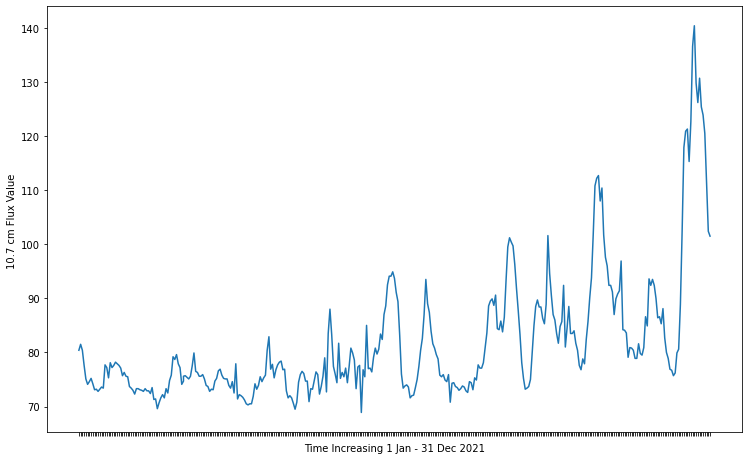

In [50]:
x=f10_obs['Date']
y=f10_obs['Observed Flux']

plt.rcParams["figure.figsize"] = [10.50, 6.50]
plt.rcParams["figure.autolayout"] = True


fig, ax = plt.subplots()
ax.plot(x, y, marker='', linestyle='-')
plt.ylabel("10.7 cm Flux Value ")
plt.xlabel("Time Increasing 1 Jan - 31 Dec 2021")

ax.axes.xaxis.set_ticklabels([]) # just show ticks, no labels
plt.show()

#### Solar Regions Summaries (SRS) from 2021

The SRS contains a daily sunspot record, including: Sunspot Area, Z (Zurich Classification Type), Mag Type, and Location. Other metrics can be calculated from these data, such as daily sunspot number.

A tar.gz file of all daily SRS summaries from 2021 was download from ftp.swpc.noaa.gov on 12/19/22 and saved locally.

In [12]:
import tarfile

In [13]:
file = tarfile.open('C:/Users/john_/OneDrive/Desktop/SWPC/F10 Project/2021_SRS.tar.gz')

In [14]:
file.extractall('C:/Users/john_/OneDrive/Desktop/SWPC/F10 Project')

In [15]:
file.close()

In [16]:
import os

In [17]:
folder = os.chdir('C:/Users/john_/OneDrive/Desktop/SWPC/F10 Project/2021_SRS')

In [18]:
os.getcwd() # local folder where all files are saved

'C:\\Users\\john_\\OneDrive\\Desktop\\SWPC\\F10 Project\\2021_SRS'

In [19]:
entries = os.listdir(folder) # list all files in folder

In [20]:
len(entries) # counts all files in folder, corresponding the 365 days in the year

366

The data can now begin to be extracted from the daily SRS's.

In [21]:
file1 = entries[0] # saving the first file to a variable 

In [22]:
test_file = open(file1, "r") # displaying the text file
print(test_file.read())
test_file.close()

:Product: 0101SRS.txt
:Issued: 2021 Jan 01 0030 UTC
# Prepared jointly by the U.S. Dept. of Commerce, NOAA,
# Space Weather Prediction Center and the U.S. Air Force.
#
Joint USAF/NOAA Solar Region Summary
SRS Number 1 Issued at 0030Z on 01 Jan 2021
Report compiled from data received at SWO on 31 Dec
I.  Regions with Sunspots.  Locations Valid at 31/2400Z 
Nmbr Location  Lo  Area  Z   LL   NN Mag Type
2794 S16W68   344  0180 Hsx  02   01 Alpha
2795 S18W38   316  0030 Bxo  10   04 Beta
IA. H-alpha Plages without Spots.  Locations Valid at 31/2400Z Dec
Nmbr  Location  Lo
None
II. Regions Due to Return 01 Jan to 03 Jan
Nmbr Lat    Lo
None



#### SWPC Daily F-10 (forecast)

These forecasts can be extracted from the Report of Solar-Geophysical Activity (SGARF)

In [23]:
file1 = tarfile.open('C:/Users/john_/OneDrive/Desktop/SWPC/F10 Project/2021_RSGA.tar.gz')

In [24]:
file1.extractall('C:/Users/john_/OneDrive/Desktop/SWPC/F10 Project')
file1.close()

In [25]:
folder1 = os.chdir('C:/Users/john_/OneDrive/Desktop/SWPC/F10 Project/2021_RSGA')

In [26]:
entries1 = os.listdir(folder1)

In [27]:
file2 = entries1[0]

In [28]:
test_file2 = open(file2, "r") # displaying the text file
print(test_file2.read())
test_file2.close()

:Product: 0101RSGA.txt
:Issued: 2021 Jan 01 2200 UTC
# Prepared jointly by the U.S. Dept. of Commerce, NOAA,
# Space Weather Prediction Center and the U.S. Air Force.
#
Joint USAF/NOAA Solar Geophysical Activity Report and Forecast
SDF Number 1 Issued at 2200Z on 01 Jan 2021

IA.  Analysis of Solar Active Regions and Activity from 31/2100Z to
01/2100Z: Solar activity has been at very low levels for the past 24
hours. There are currently 2 numbered sunspot regions on the disk.
IB.  Solar Activity Forecast: Solar activity is expected to be very low
with a slight chance for a C-class flare on day one (02 Jan) and
expected to be very low on days two and three (03 Jan, 04 Jan).

IIA.  Geophysical Activity Summary 31/2100Z to 01/2100Z: The geomagnetic
field has been at quiet levels for the past 24 hours. Solar wind speed
reached a peak of 381 km/s at 01/0012Z.  Electrons greater than 2 MeV at
geosynchronous orbit reached a peak level of 553 pfu.
IIB.  Geophysical Activity Forecast: The geoma

Or you can ask the db guy nicely to pull the data :)

In [29]:
f10_pred = pd.read_csv('C:/Users/john_/OneDrive/Desktop/SWPC/F10 Project/f10_pred.csv')

In [30]:
f10_pred.head()

,Issueday,day1,day2,day3,day4,day5,day6,day7
0,2021-01-01 00:00:00.000,80.0,79.0,79.0,78.0,78.0,78.0,78.0
1,2021-01-02 00:00:00.000,80.0,80.0,78.0,78.0,78.0,78.0,78.0
2,2021-01-03 00:00:00.000,80.0,78.0,78.0,78.0,78.0,78.0,78.0
3,2021-01-04 00:00:00.000,77.0,77.0,77.0,77.0,77.0,77.0,77.0
4,2021-01-05 00:00:00.000,75.0,75.0,75.0,75.0,75.0,75.0,75.0


- X-ray flares from 2021 Edited Events